In [1]:
%%bash
module list

Currently Loaded Modulefiles:
  1) jupyterhub/.jupyterhub


In [2]:
# Import libraries and stuff
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')

In [4]:
# >> sylvia_20200724, Adding the paths below.
import sys
sys.path.append('/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages')
sys.path.append('/work/bb1131/b380873/Cumulo/tigramite/tigramite/')
sys.path.append('/pf/b/b380873/conda-envs/tigramite/lib/python3.6/site-packages/tigramite-4.2.0-py3.6-linux-x86_64.egg/tigramite/__pycache__')

import sklearn

import tigramite
import data_processing as pp # >> sylvia_20200724, from tigramite removed
import plotting as tp
from pcmci import PCMCI  # >> sylvia_20200724, Removing tigramite.(pcmci)
from independence_tests import ParCorr, GPDC, CMIknn, CMIsymb  # >> sylvia_20200724, Removing tigramite.(independence_tests)

Could not import packages for CMIknn and GPDC estimation
Could not import packages for CMIknn and GPDC estimation


In [5]:
# Read in community signals. variables = cirrus, low_clouds, se, T2m in each community.
# dims [=] (number of days / observations, number of variables / communities)
signals = np.load('community_signals_all.npy')
print(signals.shape)

# Assume that there is no need to remove a transient in our case.

(366, 37)


In [6]:
T = signals.shape[0]     # time series length
# Initialize dataframe object, specify time axis and variable names
var_names = ['cirrus_' + str(i) for i in np.arange(12)] + ['low_clouds_' + str(i) for i in np.arange(12)] + \
        ['se_' + str(i) for i in np.arange(4)] + ['T2m_' + str(i) for i in np.arange(9)]
print(len(var_names))
dataframe = pp.DataFrame(signals, datatime = np.arange(T), var_names=var_names)

37


6 cirrus_6
14 low_clouds_2
32 T2m_4
6 cirrus_6


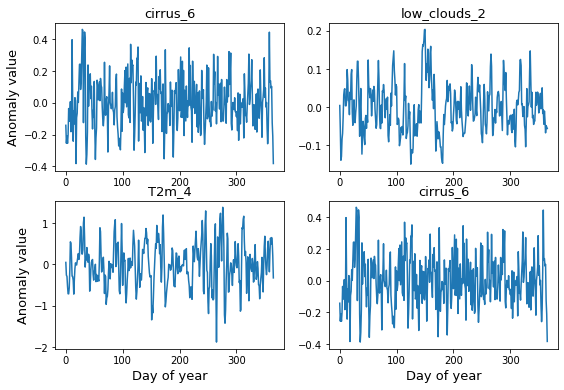

In [7]:
# Let's take a look at time series of 4 random variables.
indx = np.random.randint(signals.shape[1],size=4)

i = 0
fs = 13
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(9,6))
for r in np.arange(2):
    for c in np.arange(2):
        print(indx[i],var_names[indx[i]])
        ax[r,c].plot(signals[:,indx[i]])
        ax[r,c].set_title(var_names[indx[i]],fontsize=fs)
        if c == 0:
            ax[r,c].set_ylabel('Anomaly value',fontsize=fs)
        if r == 1:
            ax[r,c].set_xlabel('Day of year',fontsize=fs)
        i += 1

In [8]:
# Relationships here are linear. We test the inference with parCorr.
# With significance='analytic' the null distribution is assumed to be Student's $t$.
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=parcorr, verbosity=1)

In [9]:
# Format of the data is (number of points in time, number of variables)
# If it is the opposite REMEMBER TO TRANSPOSE THEM to have this format.
np.shape(signals)

(366, 37)

In [10]:
%%time
######################### STEP 1 #########################

# Set tau_max=30 for PCMCI, i.e. max delay of a month.
# pc_alpha is the significance level for the statistical test. 
# Setting to None means it is optimized using the Akaike Information.
# max_combinations is the Maximum number of combinations of conditions of current cardinality to test.
results = pcmci.run_pcmci(tau_max=30, max_combinations=1, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 30
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable cirrus_0 has 45 parent(s):
    [pc_alpha = 0.5]
        (cirrus_0 -1): max_pval = 0.00000, min_val =  0.479
        (cirrus_3 -11): max_pval = 0.01439, min_val = -0.147
        (low_clouds_11 -6): max_pval = 0.01983, min_val =  0.143
        (se_2 -1): max_pval = 0.01956, min_val =  0.135
        (T2m_2 -30): max_pval = 0.06519, min_val =  0.107
        (cirrus_2 -11): max_pval = 0.07724, min_val =  0.102
        (cirrus_2 -16): max_pval = 0.08569, min_val = -0.099
        (T2m_1 -29): max_pval = 0.10527, min_val =  0.096
        (cirrus_3 -19): max_pval = 0.11236, min_val =  0.094
        (cirrus_7 -30): max_pval = 0.10575, min_val =  0.093
        (low_clouds_6 -16): max_pval = 0.12052, min_val =  0.093
        (cirrus_1 -18


## Significant links at alpha = 0.05:

    Variable cirrus_0 has 83 link(s):
        (low_clouds_0  0): pval = 0.00000 | val = -0.648
        (cirrus_0 -1): pval = 0.00000 | val =  0.349
        (cirrus_3 -19): pval = 0.00005 | val =  0.271
        (cirrus_10 -10): pval = 0.00014 | val = -0.258
        (se_0 -23): pval = 0.00024 | val =  0.248
        (T2m_2 -17): pval = 0.00324 | val = -0.201
        (cirrus_2 -18): pval = 0.00358 | val = -0.199
        (cirrus_10 -5): pval = 0.00410 | val = -0.195
        (low_clouds_2 -2): pval = 0.00504 | val = -0.192
        (T2m_7 -2): pval = 0.00449 | val =  0.191
        (cirrus_5 -18): pval = 0.00507 | val =  0.190
        (cirrus_3 -11): pval = 0.00538 | val = -0.188
        (low_clouds_1 -19): pval = 0.00578 | val =  0.188
        (se_3 -14): pval = 0.00512 | val =  0.188
        (cirrus_6 -5): pval = 0.00644 | val =  0.186
        (cirrus_1 -27): pval = 0.00681 | val = -0.184
        (low_clouds_0 -16): pval = 0.00796 | val =  0.183
      

In [11]:
######################### STEP 2 #########################
# Returns p-values corrected for multiple testing. Control the False Discovery Rate (FDR).
# Set the alpha_level to 0.01 --> at most 1% of the links we find are going to be False Positives.
# q_matrix [=] (N vars, N vars, tau_max+1 lags)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable cirrus_0 has 2 link(s):
        (low_clouds_0  0): pval = 0.00000 | qval = 0.00000 | val = -0.648
        (cirrus_0 -1): pval = 0.00000 | qval = 0.00021 | val =  0.349

    Variable cirrus_1 has 4 link(s):
        (T2m_4 -2): pval = 0.00000 | qval = 0.00001 | val =  0.397
        (low_clouds_6  0): pval = 0.00011 | qval = 0.00011 | val = -0.262
        (low_clouds_7  0): pval = 0.00147 | qval = 0.00147 | val =  0.216
        (low_clouds_9  0): pval = 0.00152 | qval = 0.00152 | val = -0.213

    Variable cirrus_2 has 4 link(s):
        (low_clouds_2  0): pval = 0.00000 | qval = 0.00000 | val = -0.448
        (cirrus_2 -1): pval = 0.00000 | qval = 0.00044 | val =  0.346
        (low_clouds_10  0): pval = 0.00000 | qval = 0.00000 | val = -0.331
        (T2m_3  0): pval = 0.00472 | qval = 0.00472 | val =  0.193

    Variable cirrus_3 has 2 link(s):
        (low_clouds_11  0): pval = 0.00000 | qval = 0.00000 | val = -0.717
        (se_0  

CPU times: user 17.2 s, sys: 77 ms, total: 17.2 s
Wall time: 17.2 s


(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ada84215ba8>)

<Figure size 792x792 with 0 Axes>

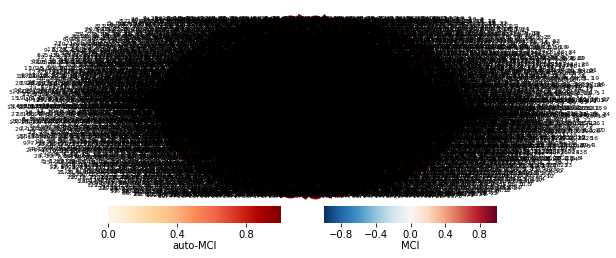

In [16]:
%%time
fig = plt.figure(figsize=(11,11))

# val_matrix has shape (N,N,tau_max+1) and contains test statistics
# var_names are the variable names.
# sig_thres is the signifance threshold
# link_matrix has shape (N,N,tau_max+1) and contains booleans for significant links
tp.plot_graph(val_matrix=results['p_matrix'],var_names=var_names,
             sig_thres=0.025,link_matrix=q_matrix)